In [ ]:
# Use Aaron's spectral based feature

In [1]:
def band_amplitudes(spec,window=[0,3],numBins=4):
    amp = np.zeros((numBins,window[1]-window[0]))
    band = 1
    for i in range(np.size(spec,0)):
        if band > numBins:
            break
        elif i < band/numBins * np.size(spec,0):
            for k in enumerate(range(window[0],window[1])):
                amp[band-1,k] += spec[i,k]**2
        else:
            band += 1
    amp_avg = np.sqrt(np.sum(amp,axis=1))
    return amp_avg
    

In [6]:
def pairwise_ratios(vec):
    M = len(vec)
    pw = np.zeros(M*(M-1)/2)
    k=0
    for i in range(M):
        for j in range(i+1,M):
            pw[k] = vec[i]/(vec[j] + 1e-2)
            k += 1
    return pw

In [7]:
def spectral_feature(data):
    seg = 50
    n   = len(data)
    feature = np.zeros((n, 66))
    for i in range(n):
        x = data[i, 0:seg]
        y = data[i, (seg):(2*seg)]
        z = data[i, (2*seg):(3*seg)]
        sgX = sgl.spectrogram(x, nfft=32, fs=25, noverlap = 30, nperseg=32);
        sgY = sgl.spectrogram(y, nfft=32, fs=25, noverlap = 30, nperseg=32);
        sgZ = sgl.spectrogram(z, nfft=32, fs=25, noverlap = 30, nperseg=32);
        specX = sgX[2]
        specY = sgY[2]
        specZ = sgZ[2]
        feature[i] = pairwise_ratios(np.concatenate((band_amplitudes(specX),band_amplitudes(specY),band_amplitudes(specZ))))
    return(feature)

In [5]:
import pickle
f1 = open('data1.pckl', 'rb')
f0 = open('data0.pckl', 'rb')
data1 = pickle.load(f1)
data0 = pickle.load(f0)
f1.close()
f0.close()

In [8]:
import numpy as np
import scipy.signal as sgl
f1 = spectral_feature(data1)
f0 = spectral_feature(data0)

/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


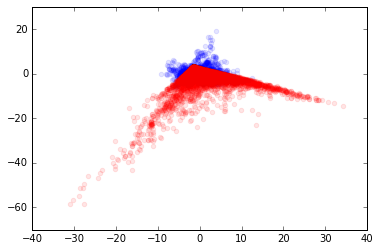

In [11]:
from matplotlib.mlab import PCA
import matplotlib.pyplot as plt
import math
%pylab inline
results = PCA(np.array(f1))

for point in results.Y:
    plt.scatter(point[0],point[1],color='blue',alpha=0.1)
flag = 0
for i in range(len(f0)):
    for j in range(len(f0[0])):
        if not isinstance(f0[i][j], float):
            print(1)
            f0[i][j] = 0
#print(svd(f0[0:100, 0:66]))
results = PCA(np.array(f0))
for point in results.Y:
    plt.scatter(point[0],point[1],color='red',alpha=0.1)
